In [57]:
import tensorflow_datasets as tfds

imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

In [59]:
train_data, test_data = imdb["train"], imdb["test"]

In [78]:
def remove_stop_words(string):
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
    query = string.lower().split(' ')
    res = [x for x in query if x not in stopwords]
    return ' '.join(res)

In [77]:
train_sentences = []
train_labels = []

test_sentences = []
test_labels = []

def distr(data, sentences, labels):
    for sentence, label in data:
        s = remove_stop_words(str(sentence.numpy())[2:-1])
        l = label.numpy()
        sentences.append(s)
        labels.append(l)
        
    
distr(train_data, train_sentences, train_labels)
distr(test_data, test_sentences, test_labels)

In [86]:
import numpy as np

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

str

In [79]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocabulary_size = 10000
oov_token="<OOV>"
max_length = 120
truncating_type = "post"
embedding_dim = 16

tk = Tokenizer(num_words=vocabulary_size, oov_token=oov_token)
tk.fit_on_texts(train_sentences)
sequences = tk.texts_to_sequences(train_sentences)
sequences_padded = pad_sequences(sequences, maxlen=max_length, truncating=truncating_type)

sequences_test = tk.texts_to_sequences(test_sentences)
sequences_test_padded = pad_sequences(sequences_test, maxlen=max_length)

In [80]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embedding_dim, input_length=max_length),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(6, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

In [81]:
from tensorflow.keras import optimizers, losses

model.compile(
    optimizer=optimizers.Adam(),
    loss=losses.binary_crossentropy,
    metrics=['accuracy'])

In [89]:
num_epochs = 10

history = model.fit(
    x=sequences_padded, 
    y=train_labels, 
    epochs=num_epochs, 
    validation_data=(sequences_test_padded, test_labels))

Epoch 1/10
780/782 [============================>.] - ETA: 0s - loss: 0.2841 - accuracy: 0.8921

2022-03-19 20:58:04.995032: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 10s 13ms/step - loss: 0.2842 - accuracy: 0.8921 - val_loss: 0.2985 - val_accuracy: 0.8754
Epoch 2/10
782/782 [==============================] - 11s 14ms/step - loss: 0.2199 - accuracy: 0.9191 - val_loss: 0.3019 - val_accuracy: 0.8745
Epoch 3/10
782/782 [==============================] - 10s 13ms/step - loss: 0.1855 - accuracy: 0.9345 - val_loss: 0.3205 - val_accuracy: 0.8695
Epoch 4/10
782/782 [==============================] - 10s 13ms/step - loss: 0.1602 - accuracy: 0.9450 - val_loss: 0.3455 - val_accuracy: 0.8631
Epoch 5/10
782/782 [==============================] - 11s 14ms/step - loss: 0.1395 - accuracy: 0.9540 - val_loss: 0.3766 - val_accuracy: 0.8592
Epoch 6/10
782/782 [==============================] - 11s 14ms/step - loss: 0.1224 - accuracy: 0.9619 - val_loss: 0.4142 - val_accuracy: 0.8546
Epoch 7/10
782/782 [==============================] - 11s 14ms/step - loss: 0.1071 - accuracy: 0.9680 - val_loss: 0.4507 - val_accuracy: 0.8499
Epo

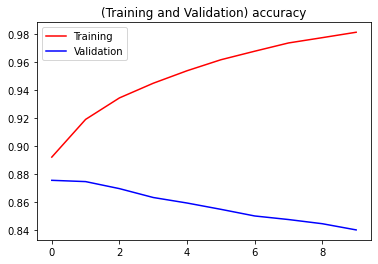

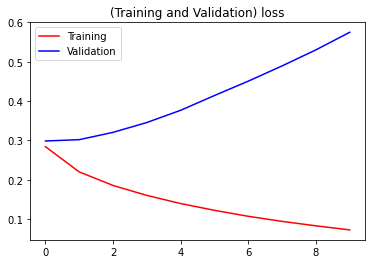

<Figure size 432x288 with 0 Axes>

In [91]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

line1, = plt.plot(epochs, acc, "r", label="Training")
line2, = plt.plot(epochs, val_acc, "b", label="Validation")
plt.legend(handles=[line1, line2])
plt.title("(Training and Validation) accuracy")
plt.figure()

line1, = plt.plot(epochs, loss, "r", label="Training")
line2, = plt.plot(epochs, val_loss, "b", label="Validation")
plt.legend(handles=[line1, line2])
plt.title("(Training and Validation) loss")
plt.figure()

plt.show()